In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [3]:
exo = pd.read_csv('exoplanet_cleaned.csv')
exo

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6625,FALSE POSITIVE,0,1,0,0,23.627035,2.264000e-04,-2.264000e-04,150.036200,0.010900,...,-185.0,4.477,0.099,-0.121,0.857,0.138,-0.101,299.21881,44.181862,16.375
6626,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6627,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6628,FALSE POSITIVE,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [4]:
#X and y values
#drop y vales and string object from df
X = exo.drop(columns=['koi_disposition']).values
y = exo["koi_disposition"].values

print(X.shape, y.shape)


(6630, 40) (6630,)


In [5]:
#separate 'training' and 'testing' data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
y_train

array(['CONFIRMED', 'CONFIRMED', 'CONFIRMED', ..., 'FALSE POSITIVE',
       'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [7]:

# data_train = y_train.copy()
# data_test = y_test.copy()

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)
encoded_y_test

array([1, 0, 1, ..., 1, 1, 1])

In [8]:
from sklearn.preprocessing import MinMaxScaler
X_scale = MinMaxScaler().fit(X_train)

X_train_scaled = X_scale.transform(X_train)
X_test_scaled = X_scale.transform(X_test)

In [9]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')


from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
#fit will try all possible combinatiopns of C and gamma
grid = GridSearchCV(model, param_grid, verbose=3)
grid.fit(X_train_scaled, encoded_y_train)

# model.fit(X_train_scaled, encoded_y_train)
predictions = grid.predict(X_test_scaled)
print(predictions)
print(encoded_y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.989, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.994, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.991, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.993, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.986, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.989, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.994, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.991, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.993, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    7.5s finished


In [10]:
label_encoder.inverse_transform(predictions)

array(['FALSE POSITIVE', 'CONFIRMED', 'FALSE POSITIVE', ...,
       'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE'], dtype=object)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions,
                            target_names=["CONFIRMED", "FALSE POSITIVE"]))

                precision    recall  f1-score   support

     CONFIRMED       1.00      0.97      0.98       539
FALSE POSITIVE       0.99      1.00      0.99      1119

      accuracy                           0.99      1658
     macro avg       0.99      0.99      0.99      1658
  weighted avg       0.99      0.99      0.99      1658



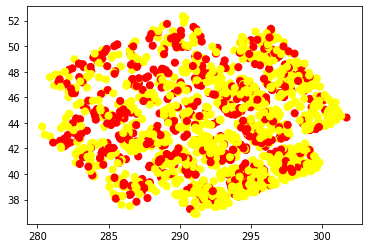

In [78]:
ax = plt.gca()
plt.scatter(X_test[:, 37], X_test[:, 38], c=encoded_y_test, s=50, cmap='autumn')

In [20]:
# Save the model
import joblib
filename = 'SVM_model.sav'
joblib.dump(grid, filename)

['SVM_model.sav']

In [79]:

grid

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)